In [1]:
from active_critic.server.init_reach import make_acl
from active_critic.utils.gym_utils import sample_expert_transitions
import matplotlib.pyplot as plt

/home/hendrik/anaconda3/envs/ac/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-11-16 01:17:03.597838: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/hendrik/anaconda3/envs/ac/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [2]:
import torch as th
th.randint(10, [1])

tensor([4])

/home/hendrik/anaconda3/envs/ac/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hendrik/anaconda3/envs/ac/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hendrik/anaconda3/envs/ac/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hendrik/anaconda3/envs/ac/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hendrik/anaconda3/envs/ac/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hendrik/anaconda3/envs/ac/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn

Sampling transitions. 1


/home/hendrik/anaconda3/envs/ac/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hendrik/anaconda3/envs/ac/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hendrik/anaconda3/envs/ac/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hendrik/anaconda3/envs/ac/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hendrik/anaconda3/envs/ac/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


Sampling transitions. 1
Sampling transitions. 10
/data/bing/hendrik/5e-1 sync offset/best_validation
Success Rate: 0.0
Reward: 0.22243833541870117
training samples: 2
Sampling transitions. 1
Sampling transitions. 10
/data/bing/hendrik/5e-1 sync offset/best_validation
Success Rate: 0.0
Reward: 0.5587801337242126
training samples: 3
Sampling transitions. 1
Sampling transitions. 10
/data/bing/hendrik/5e-1 sync offset/best_validation
Success Rate: 0.0
Reward: 0.5794677734375
training samples: 4
Sampling transitions. 1
Sampling transitions. 10
Success Rate: 0.0
Reward: 0.29319462180137634
training samples: 5
Sampling transitions. 1


KeyboardInterrupt: 

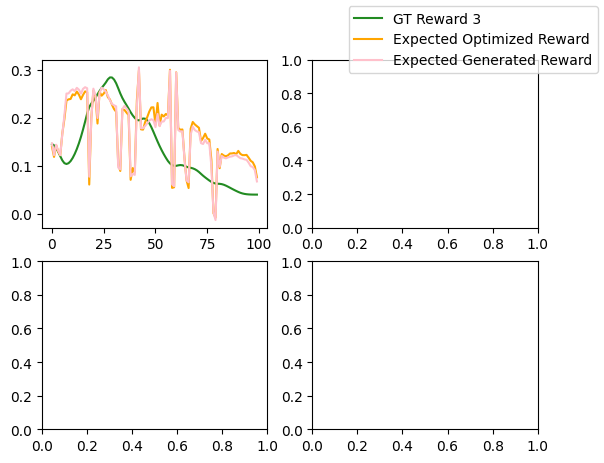

In [3]:
device = 'cuda'
acl, env, expert, seq_len, epsiodes, device = make_acl(device)
acl.train(epochs=100)

In [ ]:
acl.train_data.actions.shape

Sampling transitions. 1


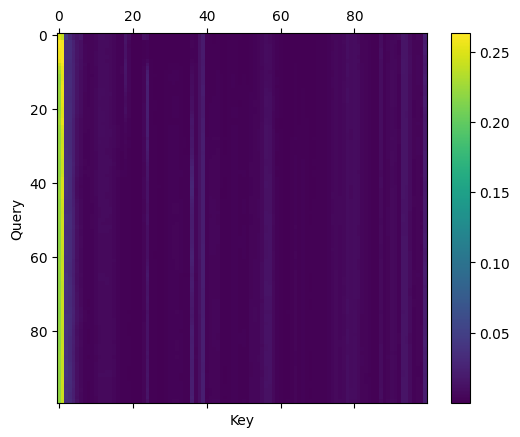

In [ ]:
acl.policy.eval()
acl.policy.reset()
obs = env.reset()
transitions = sample_expert_transitions(policy=acl.policy.predict, env=env, episodes=1)
attention = acl.policy.critic.attention
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Query')
ax.set_xlabel('Key')
cax = ax.matshow(attention[0].to('cpu'), interpolation='nearest')
fig.colorbar(cax)
plt.show()